# Main Experiments
    refer mainRTain_test.py
    July 21 2025

In [1]:
import os
import sys
sys.path.append('./')
sys.path.append('../')

import numpy as np
import pandas as pd

from datetime import datetime

from datetime import datetime

from Core.models import CModels
from Core.dataset import CDataset, CDatasetWrapper
from Core.plots import CPlots

from mainRTrain_test import Run_RTrain, Run_RV
from Core.tSNE import tSNEPlots, Beth, Kyoto

# Configure Dataset

## <font color='red'> KYOTO </font>

### Configure

In [2]:
cDATA = 'Kyoto'

objDS = CDataset()

strFileName =  r'../DATA/Kyoto2015DS.csv'
#strPath = os.path.join(strRoot, strFileName)
listData, listLabel = objDS.GetKyotoDataset(strFileName)
print('Kyoto:', listData.shape, listLabel.shape)

fTestSize = 0.9 # Test size for computing models' performance
nEPOCHS = 10
nSteps = 5
bBethOOS = False

CDataset Object Created
label
0    30000
1    30000
dtype: int64
Kyoto: (60000, 13) (60000, 1)


### Add synthetic data

In [ ]:
strSynFileName = '../DATA/Kyoto_Syn_3000.csv'
dfSyn = pd.read_csv(strSynFileName, delimiter=',')
dfSyn['Label'] = 1
print(dfSyn.shape)

listSynLabel = dfSyn['Label'].to_numpy().reshape(-1,1)
print(listSynLabel.shape)

listSynData = dfSyn.drop('Label', axis=1)
print(listSynData.shape)

listData = np.vstack([listData, listSynData])
listLabel = np.vstack([listLabel, listSynLabel])
print('Kyoto:', listData.shape, listLabel.shape)

### Add adversarial data

In [ ]:
strAdvFileName = '../DATA/Kyoto_Adv_3000.csv'
listAdv = np.loadtxt(strAdvFileName, delimiter=',')
print(listAdv.shape, listAdv[:,0:13].shape)

listData = np.vstack((listData, listAdv[:,0:13]))
listLabel = np.vstack((listLabel, listAdv[:,13].reshape(-1,1)))
print('Kyoto:', listData.shape, listLabel.shape)

### TSNE

In [ ]:
objDS = CDataset()
strFileName = r'../DATA/Kyoto2015DS.csv'
df = Kyoto(objDS, strFileName, True)

strOutputFile = './local-data/tsneKyoto_train.pdf'
tSNEPlots(df, listLabels=['Positive', 'Negative'], 
          strOutputFile=strOutputFile)

#### All 60k Samples

In [ ]:
listDS = np.hstack((listData, listLabel))
print(listDS.shape)

# Here add header to the dataset and also add labels 
dfCols = ['Bin_'+str(i) for i in range(listData.shape[1])]
dfCols.append('Labels')
#print(dfCols)
df = pd.DataFrame(listDS, columns=dfCols)
tSNEPlots(df, listLabels=['Positive', 'Negative'], 
          strOutputFile=None)


## <font color='red'> BETH </font>

#### <font color='blue'>VARIANT 2: OOS</font>

##### Dataset Info

In [7]:
oDW = CDatasetWrapper()
strFileName = r'../DATA/Beth_16Aug2023.csv'
oDW.DS_BETH_OOS(strFileName)

CDatasetWrapper Object Created
CDataset Object Created
sus
0    870867
1    156103
dtype: int64
(1026970, 6) (1026970, 1)
Total: (1026970, 6) Training: (856900, 6) Testing: (170070, 6)
(856900, 6) (170070, 6)
[0 1] [855046   1854]
[0 1] [ 15821 154249]


##### Prepare

In [ ]:
cDATA = 'BETH_OOS'

objDS = CDataset()
strFileName =  r'../DATA/Beth_16Aug2023.csv'
listData, listLabel = objDS.GetBethDataset(strFileName)

print('Beth:', listData.shape, listLabel.shape)
unique_labels, counts = np.unique(listLabel, return_counts=True)
print('Unique labels:', unique_labels, 'Counts:', counts)

fTestSize = 0.1656035
nEPOCHS = 10
nSteps = 5
bBethOOS = False

CDataset Object Created
sus
0    870867
1    156103
dtype: int64
Beth: (1026970, 6) (1026970, 1)
Unique labels: [0 1] Counts: [870867 156103]


#### <font color='blue'>VARIANT 1: IS</font>

##### Dataset Info

In [ ]:
oDW = CDatasetWrapper()
strFileName = r'../DATA/Beth_16Aug2023.csv'
oDW.DS_BETH_IS(strFileName)

##### Prepare

In [ ]:
cDATA = 'Beth_IS'

objDS = CDataset()

strFileName =  r'../DATA/Beth_16Aug2023.csv'
listData, listLabel = objDS.GetBethDataset(strFileName)
print('Beth:', listData.shape, listLabel.shape)
unique_labels, counts = np.unique(listLabel, return_counts=True)
print('Unique labels:', unique_labels, 'Counts:', counts)

fTestSize = 0.9
nEPOCHS = 10
nSteps = 5
bBethOOS = False


CDataset Object Created
sus
0    870867
1    156103
dtype: int64
Beth: (1026970, 6) (1026970, 1)
Unique labels: [0 1] Counts: [870867 156103]


#### <font color='blue'>TSNE</font>

In [ ]:
objDS = CDataset()

strFileName = r'../DATA/Beth_16Aug2023.csv'
df = Beth(objDS, strFileName, nExp=1)
df = df.sample(frac=0.1)
print('Sampled: ', df['Labels'].value_counts())

strOutputFile = './local-data/tsneBeth_train.pdf'
tSNEPlots(df, listLabels=['Positive', 'Negative'], 
          strOutputFile=strOutputFile)

## <font color='red'> MNIST </font>

#### Dataset

In [ ]:
bBethOOS = False


#### TSNE

In [ ]:
cDATA = 'Digit'

objDS = CDataset()
listData, listLabel = objDS.PrepareMNISTDS()
print(listData.shape, listLabel.reshape(-1, 1).shape)

strOutputFile = './local-data/tsneDigit_train.pdf'

listDS = np.hstack((listData, listLabel.reshape(-1, 1)))
print(listDS.shape)

dfCols = ['Bin_'+str(i) for i in range(listData.shape[1])]
dfCols.append('Labels')
#print(dfCols)
df = pd.DataFrame(listDS, columns=dfCols)
tSNEPlots(df, listLabels=['Positive', 'Negative'], 
          strOutputFile=strOutputFile)


# <font color='blue'>NEW RUN TEST</font>

## Set Output Path

In [3]:
# Generate output directory
strOutDir = datetime.now().strftime('%Y_%m_%d')
print(strOutDir)
strDirPath = os.path.join(os.getcwd(), 'local-data', cDATA + '_' + strOutDir)
if not os.path.isdir(strDirPath):
    os.makedirs(strDirPath)


2025_10_20


### Same C_D and C_A

In [ ]:
listDefClassifier = [3, 4, 5]
listAdvClassifier = [3, 4, 5]

### Different C_D and C_A

            |A_RF                       | A_KNN                     A_MLP
    D_RF    |Same models with           |Different models          Different models
            |different hyperparameters  |
    D_KNN   |Different models           |Same models with          Different models
            |                           |different hyperparameters
    D_AB    |Different models           |Different models          Different models

In [3]:
listDefClassifier = [3, 0, 4]
listAdvClassifier = [2, 7, 5]

## Run_RTrain

Combination - D:  3 A:  2
CModels Object Created
TrainPercent: [0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75 0.8  0.85 0.9  0.95 1.  ]
Train size Fraction: 0.05
trainSize =  0.05  EPOCHS =  10
mean(tpr_aucDs) 0.967
mean(afr_aucDs) 0.524
Train size Fraction: 0.1
trainSize =  0.1  EPOCHS =  10
mean(tpr_aucDs) 0.971
mean(afr_aucDs) 0.556
Train size Fraction: 0.15
trainSize =  0.15  EPOCHS =  10
mean(tpr_aucDs) 0.975
mean(afr_aucDs) 0.5
Train size Fraction: 0.2
trainSize =  0.2  EPOCHS =  10
mean(tpr_aucDs) 0.976
mean(afr_aucDs) 0.434
Train size Fraction: 0.25
trainSize =  0.25  EPOCHS =  10
mean(tpr_aucDs) 0.977
mean(afr_aucDs) 0.515
Train size Fraction: 0.3
trainSize =  0.3  EPOCHS =  10
mean(tpr_aucDs) 0.976
mean(afr_aucDs) 0.489
Train size Fraction: 0.35
trainSize =  0.35  EPOCHS =  10
mean(tpr_aucDs) 0.976
mean(afr_aucDs) 0.502
Train size Fraction: 0.4
trainSize =  0.4  EPOCHS =  10
mean(tpr_aucDs) 0.977
mean(afr_aucDs) 0.522
Train size Fraction: 0.45
tra

<Figure size 640x480 with 0 Axes>

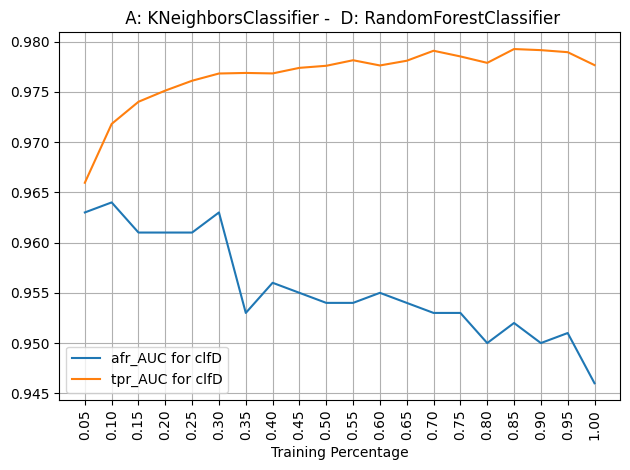

<Figure size 640x480 with 0 Axes>

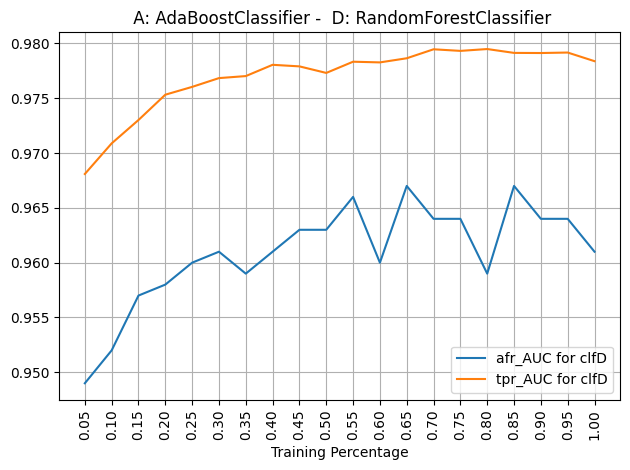

<Figure size 640x480 with 0 Axes>

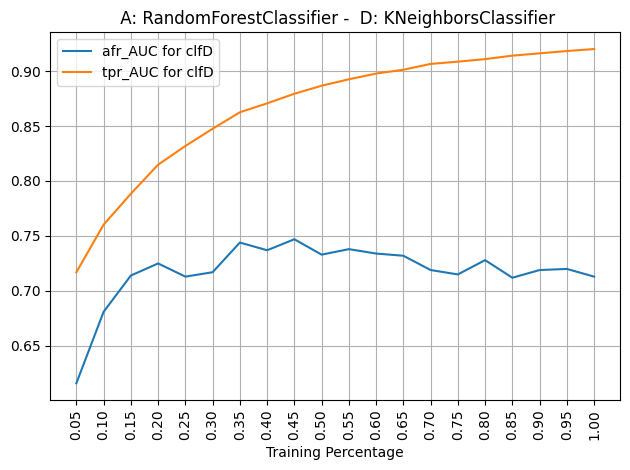

<Figure size 640x480 with 0 Axes>

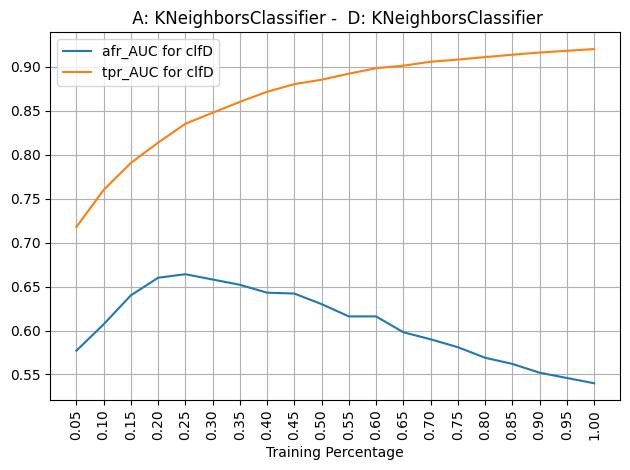

<Figure size 640x480 with 0 Axes>

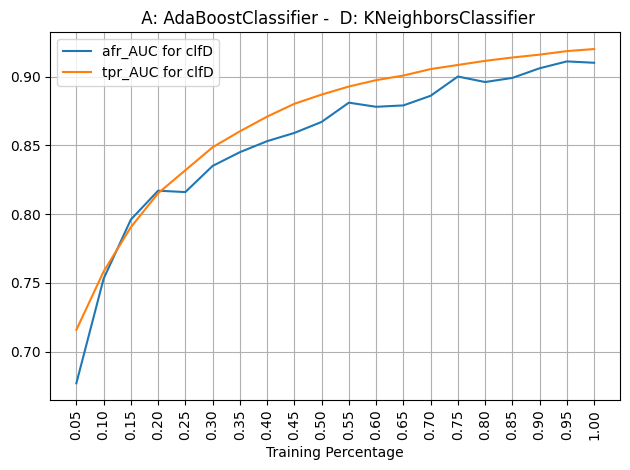

<Figure size 640x480 with 0 Axes>

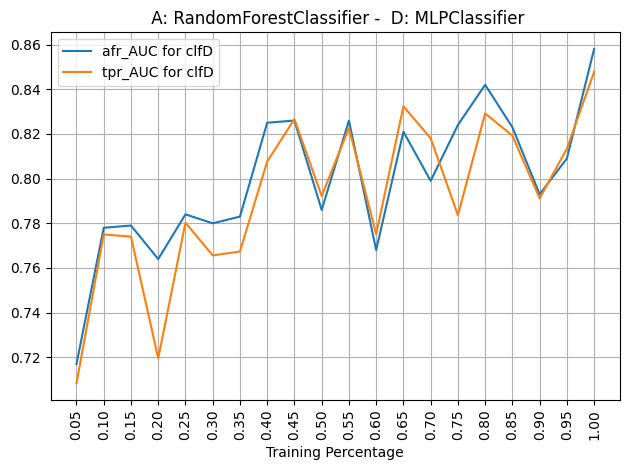

<Figure size 640x480 with 0 Axes>

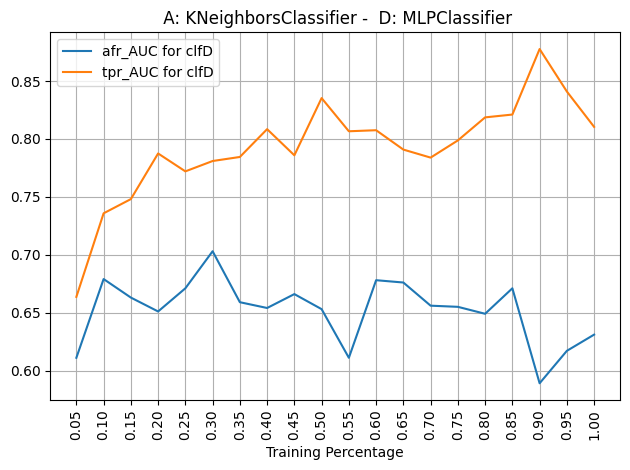

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

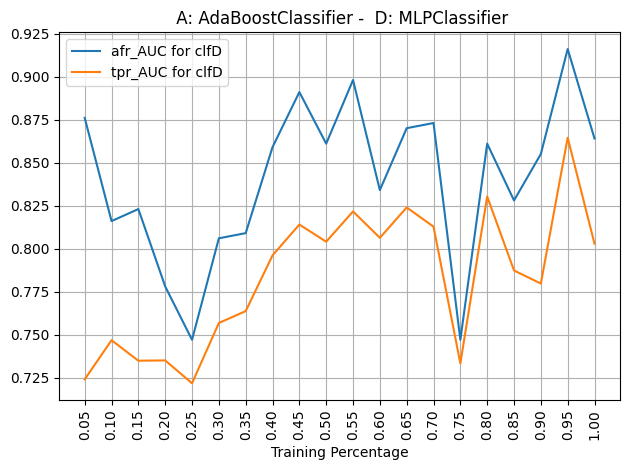

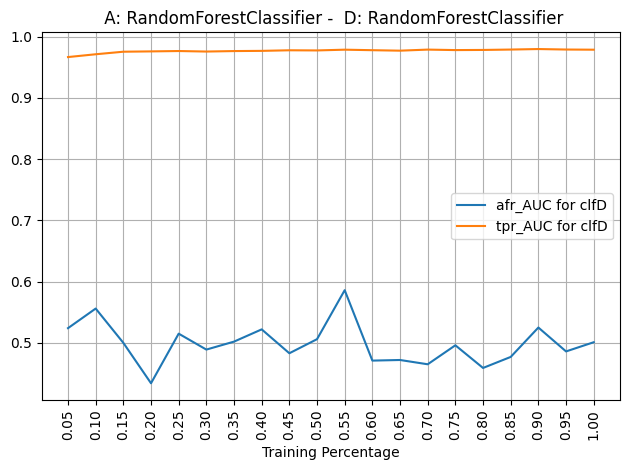

<Figure size 640x480 with 0 Axes>

In [5]:
Run_RTrain(strDirPath, fTestSize, listDefClassifier, listAdvClassifier,
           listData, listLabel, nEPOCHS=nEPOCHS, nSteps=nSteps,
           bBethOOS=bBethOOS)

## <font color='green'>Run_RV</font>

## Load previous results
    Set Local Path - If not a new run

In [4]:
#strDirPath = r'./local-data/Kyoto_2025_07_22'
#strDirPath = r'./local-data/Kyoto_2025_08_17'
strDirPath = r'./local-data/Kyoto_2025_10_20'

## If fresh run donot set the above path

In [ ]:
Run_RV(strDirPath, fTestSize, listAdvClassifier,
        listData, listLabel, nEPOCHS=nEPOCHS, nSteps=nSteps,
        bBethOOS=bBethOOS)

CModels Object Created
[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100]
rw100 =  0  EPOCHS =  10
mean(tpr_aucAs) 0.99
mean(tpr_aucRs) 0.99
mean(afr_aucRs) 0.309
rw100 =  5  EPOCHS =  10
mean(tpr_aucAs) 0.99
mean(tpr_aucRs) 0.989
mean(afr_aucRs) 0.525


# <font color='blue'>Use nbPlotResults to generate final plots</font>